In [183]:
import sys
sys.path.append("..")
import os

In [184]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
import torchvision.models as models
from vasync.models.pretext_model import ClassifierPretextModel
from vasync.utils.common import load_config

In [185]:
def load_model(config_path, checkpoint_path):
    config = load_config(config_path)
    pretext_base_model = config["pretext_base_model"]
    num_cls = config["num_cls"]
    model = ClassifierPretextModel(pretext_base_model=pretext_base_model, 
                                   num_cls=num_cls)
    state_dict = torch.load(checkpoint_path)
    model.load_state_dict(state_dict)
    return model

In [186]:
checkpoint_path = "../outputs/img_cls/img_cls_pseudolbl30/checkpoint_epoch_126.pt"
config_path = "../experiments/img_cls_pseudolbl_30/config.yml"
model = load_model(config_path, checkpoint_path)

In [187]:
def visualize_kernels(kernels):
    # kernels size B x 3 x K x K
    kernels = kernels - kernels.min()
    kernels = kernels / kernels.max()
    img = make_grid(kernels)
    plt.imshow(img.permute(1, 2, 0))

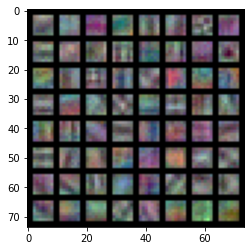

In [188]:
kernels_first_convlayer = list(model.children())[0][0].weight.detach()
visualize_kernels(kernels_first_convlayer)

In [193]:
# kernels_second_firstresid = list(list(model.children())[0][4][0].children())[2].weight.detach()[:, 0, :, :].unsqueeze(1)
# print(kernels_second_firstresid.shape)
# visualize_kernels(kernels_second_firstresid)

In [190]:
resnet50 = models.resnet50(pretrained=True)

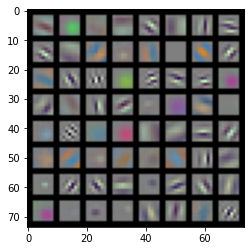

In [191]:
kernels_first_convlayer = list(resnet50.children())[0].weight.detach()
visualize_kernels(kernels_first_convlayer)